<a href="https://colab.research.google.com/github/wingated/cs180_labs/blob/main/kde.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Kernel Density Estimation

In this lab, we'll learn the basics of a visualization technique known as "kernel density estimation".  This allows us to build nice "smoothed" histograms.  But we'll start by building our own histogram binning function.

In [ ]:
%matplotlib inline

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

plt.rcParams['figure.figsize'] = [6, 6]


# TODO

Write a function that accepts as input a list of data (just floats for now) and parameters controlling the size and location of bins.  The function returns a list of counts, along with a list of where the left edges of each bin are and the width of the bins.

In [ ]:
# data is a 1-dimensional numpy vector of data.
# bin_start represents the left edge of our bins
# bin_end represents the right edge of our bins
# n_bins represents is the number of bins
#
# this function should return 3 things:
#   bin_counts - a vector of counts for each bin
#   bin_left_edges - a vector showing where each bin begins
#   bin_width - a single float telling how wide each bin is
#
def bin_data( data, bin_start=0, bin_end=1.0, n_bins=10 ):
  bin_counts = np.zeros((n_bins))
  bin_left_edges = np.zeros((n_bins))
  #
  # XXX fill me in!
  #
  # a few hints:
  # what is the width of each bin?
  # where does each bin start?
  #

  # Corner cases:
  # if a data point is to the left of the leftmost bin, or to the right of the rightmost bin, drop it into the nearest bin.
  # if a data point lands exactly on the edge between two bins, drop it into the right bin (as opposed to the left bin).  Maybe use np.floor?

  # this function should return the counts in each bin, as well as where each bin starts
  return bin_counts, bin_left_edges, bin_width

# TODO

Code up a quick function that does a sanity check on your binning.  This should perform two checks: 

1) The total number of items in the bins should always be equal to the length of the data array

2) No counts should be negative

In [ ]:
# bins is a 1d numpy vector of counts
# data is our original data
#
# returns a boolean - True if it's a valid binning, False otherwise
#
# maybe look at np.sum and np.all?
def sanity_check( bins, data ):
  pass


In [ ]:
data = np.atleast_1d([1,2,3,4,5,6,7,8,9,10])*0.07
bin_counts, bin_left_edges, bin_width = bin_data( data )
sanity_check( bin_counts, data )

True

# Test it!

Ok, let's test your function by visualizing a few things.

Here are some data sets that you should test your function on, and some visualizations that I got when I ran them.  Remember, they're stochastic, so your plots may look a little different than mine.

[1. 1. 2. 1. 2. 1. 1. 1. 0. 0.]
[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]
0.1


<BarContainer object of 10 artists>

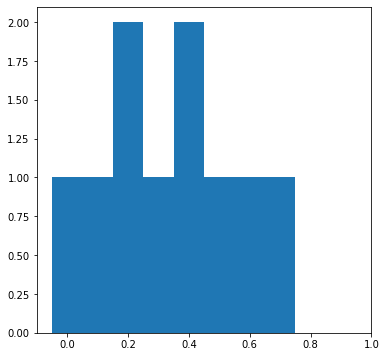

In [ ]:
data = np.atleast_1d([1,2,3,4,5,6,7,8,9,10])*0.07
bin_counts, bin_left_edges, bin_width = bin_data( data, bin_start=0, bin_end=1, n_bins=10 )
print(bin_counts)
print(bin_left_edges)
print(bin_width)
plt.bar( bin_left_edges, bin_counts, bin_width )

<BarContainer object of 100 artists>

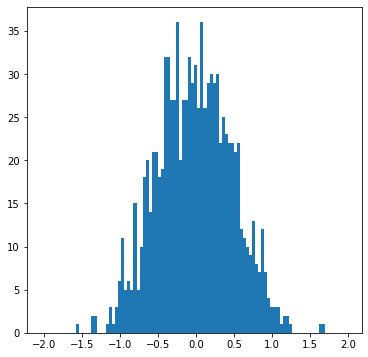

In [ ]:
data = 0.5*np.random.randn(1000)
bin_counts, bin_left_edges, bin_width = bin_data( data, bin_start=-2, bin_end=2, n_bins=100 )
plt.bar( bin_left_edges, bin_counts, bin_width )

<BarContainer object of 100 artists>

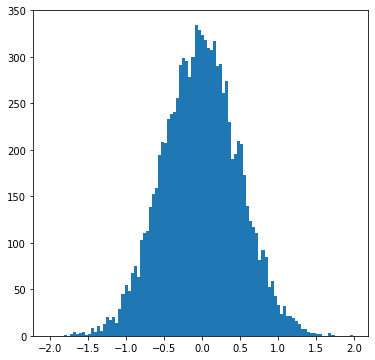

In [ ]:
data = 0.5*np.random.randn(10000)
bin_counts, bin_left_edges, bin_width = bin_data( data, bin_start=-2, bin_end=2, n_bins=100 )
plt.bar( bin_left_edges, bin_counts, bin_width )

<BarContainer object of 100 artists>

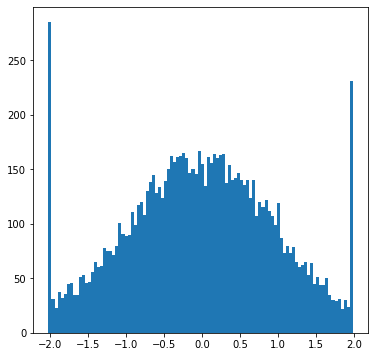

In [ ]:
data = np.random.randn(10000)
bin_counts, bin_left_edges, bin_width = bin_data( data, bin_start=-2, bin_end=2, n_bins=100 )
plt.bar( bin_left_edges, bin_counts, bin_width )

# Small number of bins.

What happens when the number of bins is big, but the amount of data is small?

<BarContainer object of 100 artists>

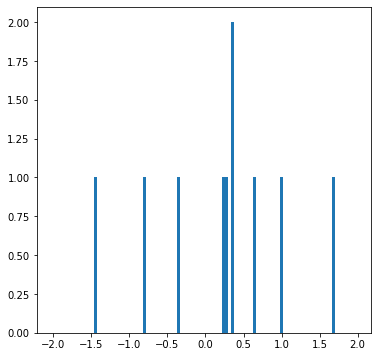

In [ ]:
data = np.random.randn( 10)
bin_counts, bin_left_edges, bin_width = bin_data( data, bin_start=-2, bin_end=2, n_bins=100 )
plt.bar( bin_left_edges, bin_counts, bin_width)

# TODO - Partial bins

Let's smooth out our binning.

Instead of dropping each data point into a single bin *b*, let's drop most of it into bin b, and part of it into bin *b-1* and part into *b+1*.  This will smooth out our histogram!

More generally, given a list of *proportions*, let's drop some of each data point into a number of bins.

You must write a function called "smooth_bin_data" which is just like your "bin_data" function above, but which takes an additional argument "props".  Props is a list of proportions, and represents the amount of each data point that gets dropped into adjacent bins.

So, if props is a list like [0.1,0.2,0.4,0.2,0.1], you should drop
* 0.1 into bin *b-2*,
* 0.2 into bin *b-1*,
* 0.4 into bin *b*,
* 0.2 into bin *b+1*,
* 0.1 into bin *b+2*

Of course, your code should work for a list of props that is arbitrarily long.

In [ ]:
def smooth_bin_data( data, bin_start=0, bin_end=1.0, n_bins=10, props=[0.1,0.2,0.4,0.2,0.1] ):
  bin_counts = np.zeros((n_bins))
  bin_left_edges = np.zeros((n_bins))

  # XXX fill me in!
  
  # this function should return the counts in each bin, as well as where each bin starts
  return bin_counts, bin_left_edges, bin_width

<BarContainer object of 10 artists>

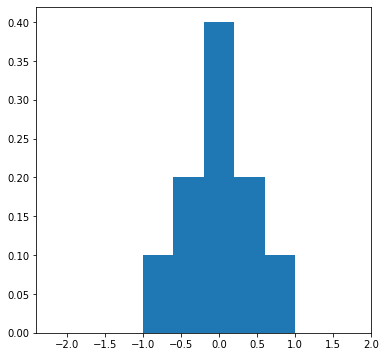

In [ ]:
data = [ 0.0 ]
props = [0.1,0.2,0.4,0.2,0.1]
bin_counts, bin_left_edges, bin_width = smooth_bin_data( data, bin_start=-2, bin_end=2, n_bins=10, props=props )
plt.bar( bin_left_edges, bin_counts, bin_width)

# Great! Let's experiment with cool windowing functions

Now that we can smooth our histogram, we can use all sorts of props.  These are known as *windowing functions*, or sometimes *kernels*.

Kernels are kind of like distributions: they should always consist of only positive numbers, and they should sum to one.

In [ ]:
# Here is a uniform kernel
def uniform_kernel( nbins ):
  tmp = np.ones(nbins)
  return tmp/np.sum(tmp)

# Here is a gaussian kernel
def gaussian_kernel( nbins, ss=1.0 ):
  mu = (nbins-1)/2
  x = np.atleast_1d( range(nbins) )
  tmp = np.exp( -(1/ss) * (x-mu)*(x-mu))
  return tmp/np.sum(tmp)


# TODO

Code up the triangular windowing function.

In [ ]:
# Here is a triangular kernel
def triangular_kernel( nbins=11, width=5 ):
  pass

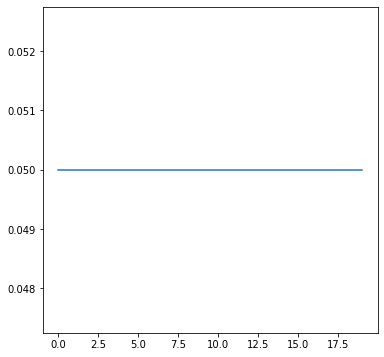

In [ ]:
props=uniform_kernel(20)
plt.plot(props)

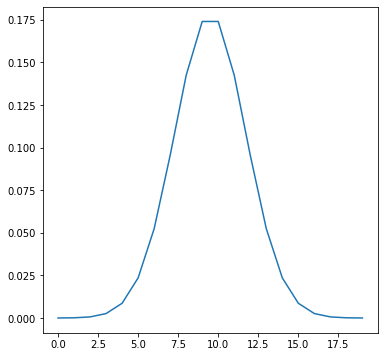

In [ ]:
props=gaussian_kernel(20,ss=10)
plt.plot(props)

<BarContainer object of 100 artists>

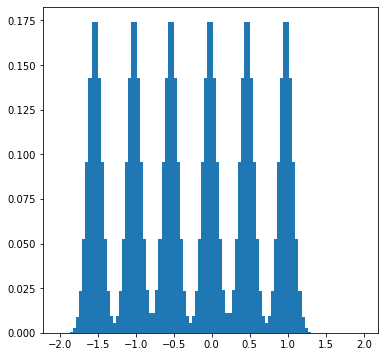

In [ ]:
data = [-1.5, -1.0, -0.5, 0.0, 0.5, 1.0]
props=gaussian_kernel(20,ss=10)
bin_counts, bin_left_edges, bin_width = smooth_bin_data( data, bin_start=-2, bin_end=2, n_bins=100, props=props )
plt.bar( bin_left_edges, bin_counts, bin_width)

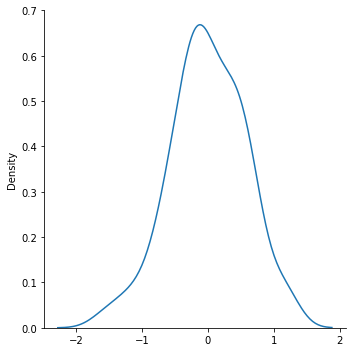

In [ ]:
data = 0.5*np.random.randn(100)
sns.displot(data,kind='kde')

# TODO - tune parameters

Can you use your smooth_bin_data function to make your smoothed histogram look like the KDE plot above?

In [ ]:
# XXX fill me in!

True


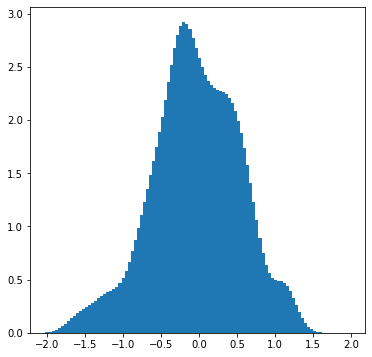

In [ ]:
plt.bar( bin_left_edges, bin_counts, bin_width)
print(sanity_check(bin_counts,data))